In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [2]:
kiva = pd.read_csv('kivamix.csv')

In [3]:
kiva.shape

(419156, 35)

Variables of interest: 



In [5]:
print(kiva['DESCRIPTION_TRANSLATED'].isnull().sum(), kiva['TAGS'].isnull().sum(), kiva['LOAN_USE'].isnull().sum())

3253 71842 3246


In [6]:
#Converting long text columns to length of words and count of characters
#Step1 is to replace nulls
kiva['DESCRIPTION_TRANSLATED'].fillna(' ', inplace=True)
kiva['TAGS'].fillna(' ', inplace=True)
kiva['LOAN_USE'].fillna(' ', inplace=True)

In [7]:
print(kiva['DESCRIPTION_TRANSLATED'].isnull().sum(), kiva['TAGS'].isnull().sum(), kiva['LOAN_USE'].isnull().sum())

0 0 0


In [8]:
#Step 2 is to update new columns
def word_len_count(column):
    word_count = len(column.split())
    return word_count

def char_len_count(column):
    char_count = column.replace(' ','')
    char_count = len(char_count[:])
    return char_count

kiva['word_count_DT'] = kiva['DESCRIPTION_TRANSLATED'].apply(word_len_count)
kiva['word_count_TAGS'] = kiva['TAGS'].apply(word_len_count)
kiva['word_count_LU'] = kiva['LOAN_USE'].apply(word_len_count)

kiva['char_count_DT'] = kiva['DESCRIPTION_TRANSLATED'].apply(char_len_count)
kiva['char_count_TAGS'] = kiva['TAGS'].apply(char_len_count)
kiva['char_count_LU'] = kiva['LOAN_USE'].apply(char_len_count)


In [9]:
kiva.head(2)

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,...,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,year,word_count_DT,word_count_TAGS,word_count_LU,char_count_DT,char_count_TAGS,char_count_LU
0,1455352,Raisa Jokasta,Spanish,"En la ciudad de Portoviejo, conocida como la c...",The city of Portoviejo is located in the valle...,1075.0,1075.0,1,2638561.0,NaN,...,true,monthly,field_partner,2018,192,5,4,924,36,26
1,1727469,Lorna,English,"Lorna is a married woman, 39 years old with fi...","Lorna is a married woman, 39 years old with fi...",225.0,400.0,0,3108106.0,NaN,...,true,monthly,field_partner,2019,75,3,12,371,28,69


In [10]:
kiva['month'] = kiva['POSTED_TIME'].str[5:7]

In [11]:
kiva['month'].value_counts()

05    38448
10    37934
07    37160
03    36891
11    35773
06    35590
09    34631
04    34333
08    33815
12    32309
01    31839
02    30433
Name: month, dtype: int64

In [12]:
#Mark whether Image and Video was provided
kiva['IMAGE_ID'] = np.where(kiva['IMAGE_ID'].isnull(), 0, 1)
kiva['VIDEO_ID'] = np.where(kiva['VIDEO_ID'].isnull(), 0, 1)

In [13]:
## Parse out borrower genders & borrower pictured
kiva['FEM_COUNT'] = kiva['BORROWER_GENDERS'].str.count("female")
kiva['MALE_COUNT'] = kiva['BORROWER_GENDERS'].str.count("male")
kiva['PIC_TRUE_COUNT'] = kiva['BORROWER_PICTURED'].str.count("true")
kiva['PIC_FALSE_COUNT'] = kiva['BORROWER_PICTURED'].str.count("false")


In [14]:
kiva['ANY_FEM'] = kiva['BORROWER_GENDERS'].str.contains('female').map({True:1, False:0})
kiva['ANY_MALE'] = kiva['BORROWER_GENDERS'].str.contains('male').map({True:1, False:0})
kiva['month'] = kiva['POSTED_TIME'].str[6:7]

In [15]:
#Drop unrequired columns

kiva.drop(columns = ['DESCRIPTION_TRANSLATED', 'LOAN_USE', 'TAGS', 'DESCRIPTION','LOAN_ID','LOAN_NAME', 'FUNDED_AMOUNT', 'DESCRIPTION', 'TOWN_NAME', 'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME', 'POSTED_TIME', 'RAISED_TIME', 'NUM_LENDERS_TOTAL', 'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'BORROWER_NAMES', 'COUNTRY_NAME', 'CURRENCY_POLICY','year', 'BORROWER_GENDERS', 'BORROWER_PICTURED', 'IMAGE_ID', 'VIDEO_ID'], inplace=True)

In [16]:
kiva.head(2)

,ORIGINAL_LANGUAGE,LOAN_AMOUNT,STATUS,ACTIVITY_NAME,SECTOR_NAME,COUNTRY_CODE,LENDER_TERM,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,word_count_DT,...,char_count_DT,char_count_TAGS,char_count_LU,month,FEM_COUNT,MALE_COUNT,PIC_TRUE_COUNT,PIC_FALSE_COUNT,ANY_FEM,ANY_MALE
0,Spanish,1075.0,1,Natural Medicines,Health,EC,6.0,monthly,field_partner,192,...,924,36,26,1,1.0,1.0,1.0,0.0,1.0,1.0
1,English,400.0,0,Personal Products Sales,Retail,PH,14.0,monthly,field_partner,75,...,371,28,69,3,1.0,1.0,1.0,0.0,1.0,1.0


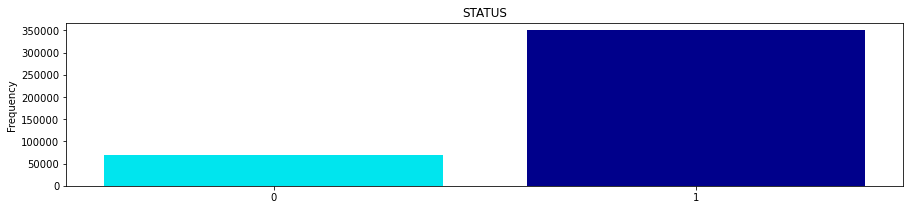

STATUS: 
 1    350000
0     69156
Name: STATUS, dtype: int64


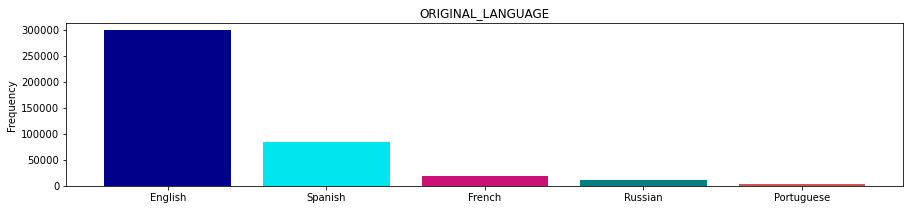

ORIGINAL_LANGUAGE: 
 English       298383
Spanish        84696
French         19036
Russian        11116
Portuguese      2686
Name: ORIGINAL_LANGUAGE, dtype: int64


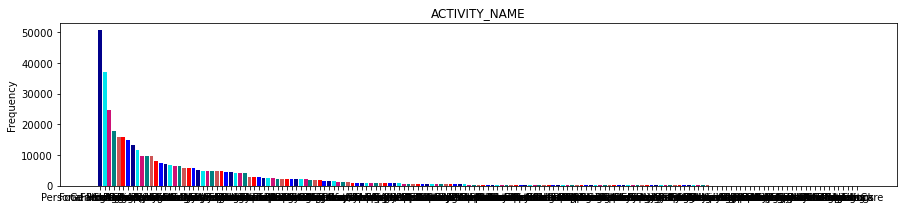

ACTIVITY_NAME: 
 Farming                      50607
General Store                37062
Personal Housing Expenses    24777
Food Production/Sales        17794
Pigs                         15960
                             ...  
Funerals                        12
Celebrations                    11
Patchwork                       11
Film                             6
Adult Care                       4
Name: ACTIVITY_NAME, Length: 163, dtype: int64


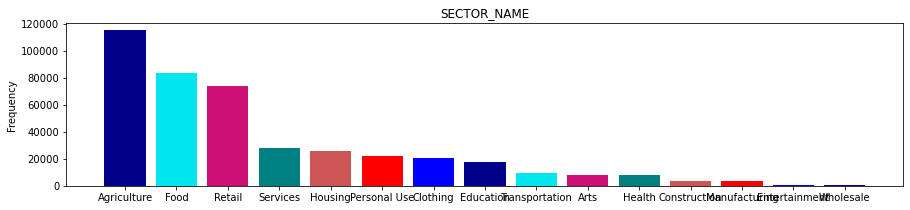

SECTOR_NAME: 
 Agriculture       114884
Food               83125
Retail             73695
Services           28195
Housing            25683
Personal Use       22092
Clothing           20250
Education          17738
Transportation      9821
Arts                7934
Health              7923
Construction        3809
Manufacturing       3182
Entertainment        495
Wholesale            330
Name: SECTOR_NAME, dtype: int64


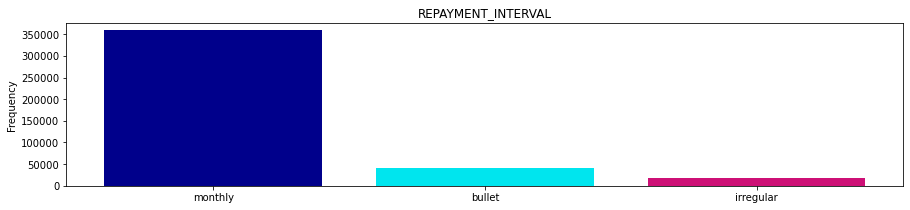

REPAYMENT_INTERVAL: 
 monthly      358610
bullet        42149
irregular     18397
Name: REPAYMENT_INTERVAL, dtype: int64


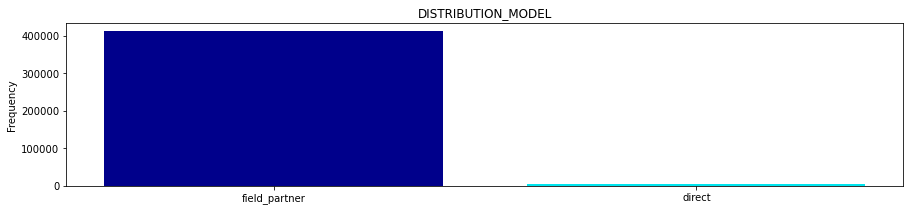

DISTRIBUTION_MODEL: 
 field_partner    413850
direct             5306
Name: DISTRIBUTION_MODEL, dtype: int64


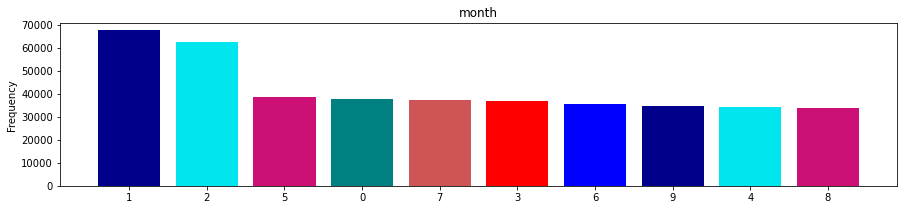

month: 
 1    67612
2    62742
5    38448
0    37934
7    37160
3    36891
6    35590
9    34631
4    34333
8    33815
Name: month, dtype: int64


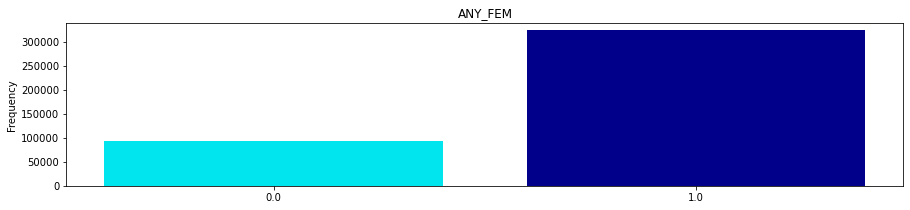

ANY_FEM: 
 1.0    323230
0.0     92687
Name: ANY_FEM, dtype: int64


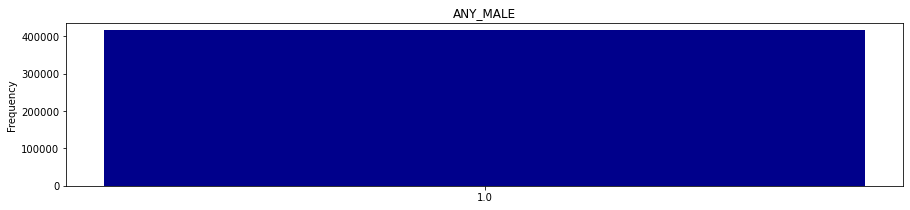

ANY_MALE: 
 1.0    415917
Name: ANY_MALE, dtype: int64


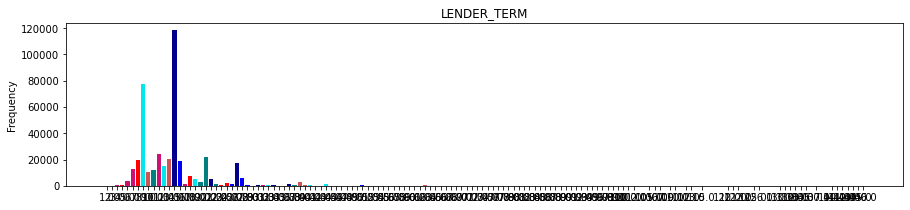

LENDER_TERM: 
 14.0     118212
8.0       77640
11.0      23870
20.0      22158
13.0      20303
          ...  
132.0         1
109.0         1
126.0         1
137.0         1
105.0         1
Name: LENDER_TERM, Length: 129, dtype: int64


In [20]:
#Plots and correlation
#Plotting the bar plots for all categorical variables
def bar_plot(dataset, variable):
    var =dataset[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue,color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue',])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))
    
categoryc = ["STATUS", "ORIGINAL_LANGUAGE", "ACTIVITY_NAME", "SECTOR_NAME", "REPAYMENT_INTERVAL", "DISTRIBUTION_MODEL", "month", "ANY_FEM", "ANY_MALE", "LENDER_TERM"]

for c in categoryc:
    bar_plot(kiva, c)

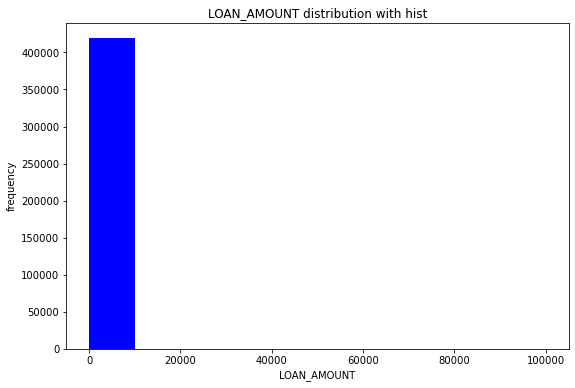

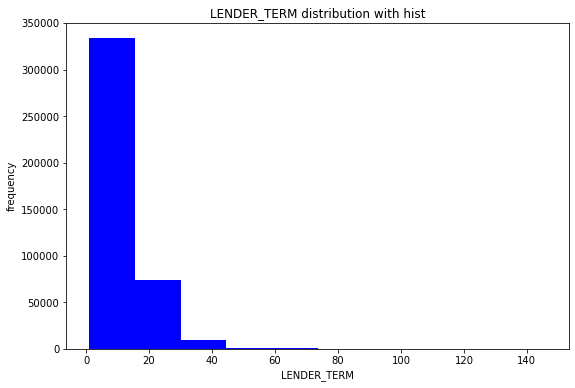

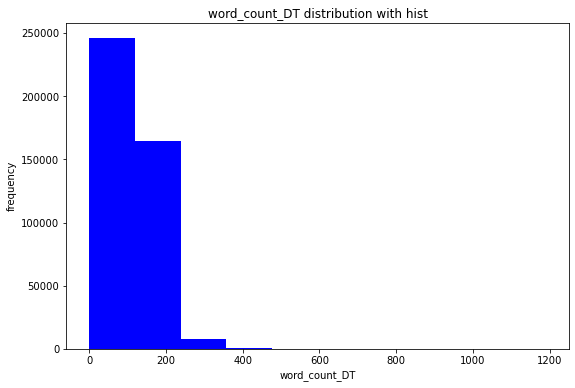

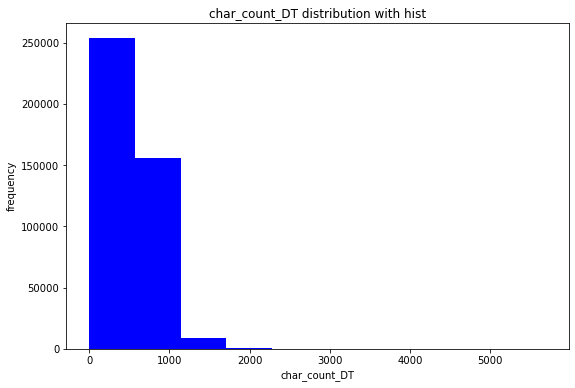

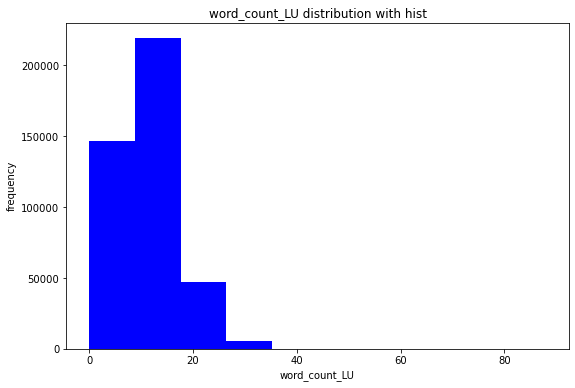

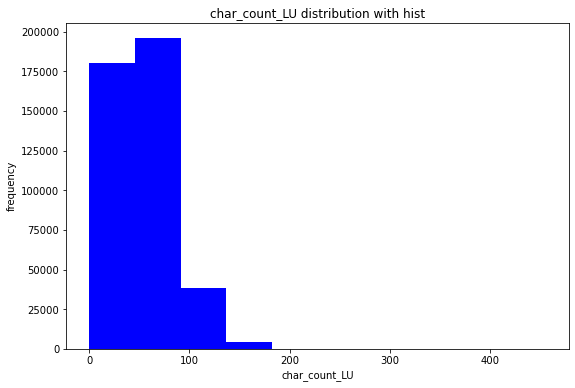

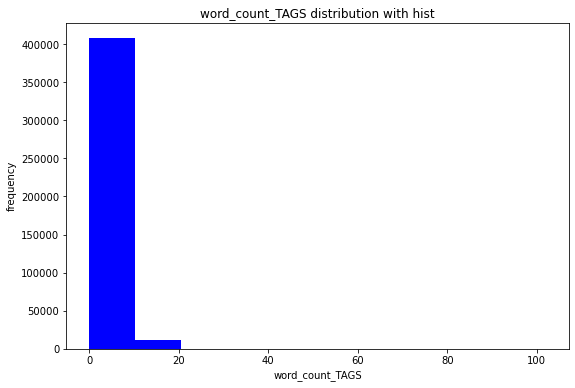

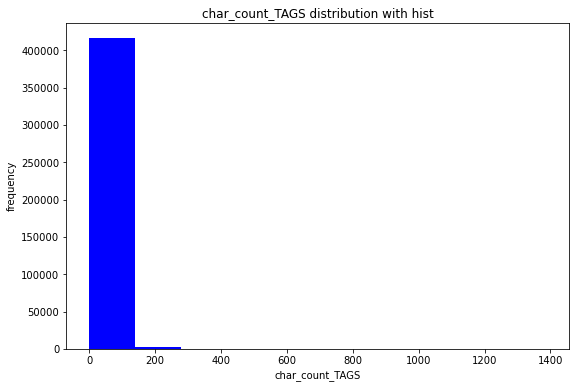

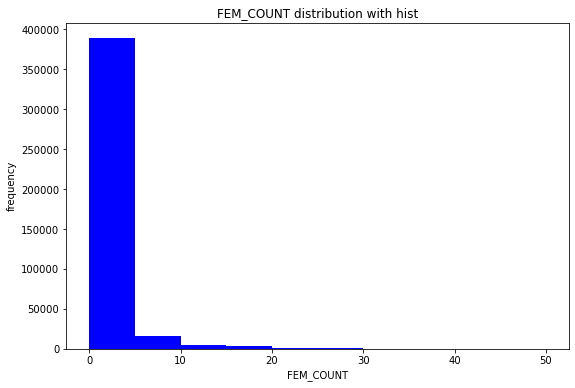

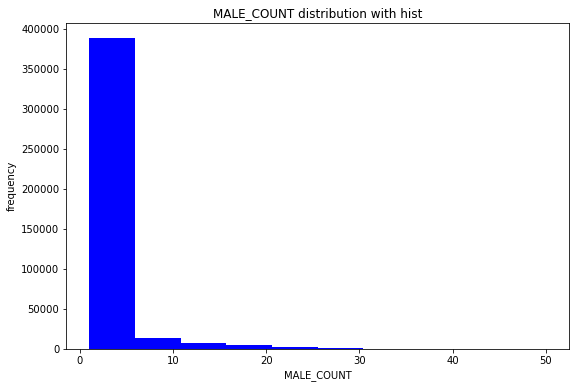

In [21]:
#Plotting histograms for numeric variables

def plot_hist(dataset, variable):
    plt.figure(figsize=(9,6))
    plt.hist(dataset[variable], bins=10,color='blue')
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()
    
numericVar = ["LOAN_AMOUNT","LENDER_TERM","word_count_DT", "char_count_DT", "word_count_LU", "char_count_LU", "word_count_TAGS", "char_count_TAGS", "FEM_COUNT", "MALE_COUNT"]
for n in numericVar:
    plot_hist(kiva, n)

<AxesSubplot:>

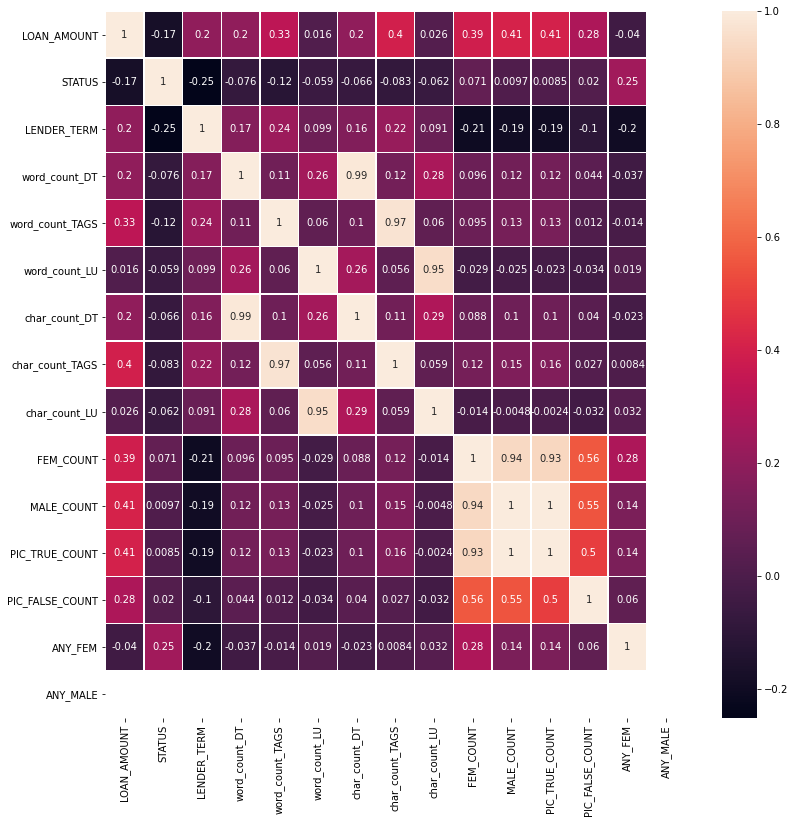

In [22]:
#Plotting correlation
fig, ax = plt.subplots(figsize=(13,13))         

# Sample figsize in inches
sns.heatmap(kiva.corr(), annot=True, linewidths=.5, ax=ax)

In [26]:
#Reducing activity_name to some key attributes
cond = kiva['ACTIVITY_NAME'].value_counts()
threshold = 1000
kiva['ACTIVITY_NAME'] = np.where(kiva['ACTIVITY_NAME'].isin(cond.index[cond >= threshold ]), kiva['ACTIVITY_NAME'], 'miscellaneous')

kiva['ACTIVITY_NAME'].value_counts()

Farming                           50607
miscellaneous                     43909
General Store                     37062
Personal Housing Expenses         24777
Food Production/Sales             17794
Pigs                              15960
Retail                            15803
Clothing Sales                    14808
Agriculture                       13298
Home Appliances                   11534
Grocery Store                      9853
Higher education costs             9576
Fruits & Vegetables                9558
Livestock                          8015
Fish Selling                       7383
Cattle                             7205
Tailoring                          6856
Food                               6530
Poultry                            6365
Personal Medical Expenses          5818
Cereals                            5788
Dairy                              5783
Primary/secondary school costs     5158
Beauty Salon                       4978
Fishing                            4828


In [30]:
#Reducing country-code to only above threshold
cond = kiva['COUNTRY_CODE'].value_counts()
threshold = 1000
kiva['COUNTRY_CODE'] = np.where(kiva['COUNTRY_CODE'].isin(cond.index[cond >= threshold ]), kiva['COUNTRY_CODE'], 'miscellaneous')

kiva['COUNTRY_CODE'].value_counts()

PH               88691
KE               51170
SV               21840
KH               19196
CO               18590
UG               16998
PK               14394
TJ               14189
PE               11180
EC               10678
miscellaneous    10668
LB                8658
IN                7672
VN                7564
PY                6839
NI                5916
WS                5763
NG                5379
AM                5072
PS                5057
TZ                5026
US                4604
KG                4402
MG                4369
BO                4333
RW                4258
HN                4075
GT                4061
TG                3980
GH                3281
LR                3280
ID                3185
MX                3103
JO                2998
SL                2750
ZW                2607
TL                2439
HT                2291
MZ                2278
ML                1999
SN                1915
CD                1862
BF                1853
MM         

In [32]:
#Creating interraction terms
kiva['word_char_DT'] = kiva['word_count_DT'] * kiva['char_count_DT']
kiva['word_char_TAGS'] = kiva['word_count_TAGS'] * kiva['char_count_TAGS']
kiva['word_char_LU'] = kiva['word_count_LU'] * kiva['char_count_LU']

kiva['MALE_FEM'] = kiva['MALE_COUNT']*kiva['FEM_COUNT']
kiva['MALE_PIC'] = kiva['MALE_COUNT']*kiva['PIC_TRUE_COUNT']
kiva['FEM_PIC'] = kiva['FEM_COUNT']*kiva['PIC_TRUE_COUNT']

In [34]:
#Creating file for model to work
kiva.to_csv('kivasmall.csv', index=False)

In [35]:
kiva.dtypes

ORIGINAL_LANGUAGE      object
LOAN_AMOUNT           float64
STATUS                  int64
ACTIVITY_NAME          object
SECTOR_NAME            object
COUNTRY_CODE           object
LENDER_TERM           float64
REPAYMENT_INTERVAL     object
DISTRIBUTION_MODEL     object
word_count_DT           int64
word_count_TAGS         int64
word_count_LU           int64
char_count_DT           int64
char_count_TAGS         int64
char_count_LU           int64
month                  object
FEM_COUNT             float64
MALE_COUNT            float64
PIC_TRUE_COUNT        float64
PIC_FALSE_COUNT       float64
ANY_FEM               float64
ANY_MALE              float64
word_char_DT            int64
word_char_TAGS          int64
word_char_LU            int64
MALE_FEM              float64
MALE_PIC              float64
FEM_PIC               float64
dtype: object